In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix

from matplotlib import font_manager

font_dirs = ["/home/hblee/.conda/envs/jax_main/fonts"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["mathtext.fontset"] = 'cm'

In [2]:
# simulate latent
def simulate_state(t0, rate, x0, num_sequences):
    p1 = (1 + (2*x0-1) * np.exp(-rate*t0)) * .5
    x1 = np.random.binomial(n=1, p=p1, size=1)
    p2 = (1 + (2*x1-1) * np.exp(-rate*(1-t0))) * .5
    x2 = np.random.binomial(
        n=1,
        p=p2,
        size=num_sequences
    )
    return x2

In [3]:
def make_hm(ax, mat, n_sim, rates, ts):

    im = ax.imshow(mat, vmin=0.5, vmax=1)
    
    # ax
    ax.set_ylabel(r'Substitution rate $\lambda$', fontsize=14)
    ax.set_xlabel(r'Divergence time $t_\mathrm{div}$', fontsize=14)
    ax.tick_params(top=True, bottom=False,
                       labeltop=True, labelbottom=False)
    ax.set_yticks(np.arange(n_sim))
    ax.set_yticklabels(['%.2f' % s if i%5 ==0 else "" for i,s in enumerate(rates)])
    ax.set_xticks(np.arange(n_sim))
    ax.set_xticklabels(['%.2f' % t if i%5 ==0 else "" for i,t in enumerate(ts)], rotation=40, ha='left')
    
    
    # colorbar
    cbar = ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.set_ylabel(r'Prediction accuracy (site 1 $\rightarrow$ site2)', rotation=-90, va="bottom", fontsize=12)
    return ax

def make_tree(ax):
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    # branch
    t0 = 0.5
    ax.plot([0.1,t0], [0.5,0.5], color='black')
    num_branches = 21
    for i in range(num_branches):
        if 6 > np.abs(i-int(num_branches/2)) > 1:
            ax.plot([t0,0.9], [0.5,(i+1)/(num_branches+1)], color='black')
    
    ax.plot([0.89, 0.89], [0.45, 0.55], ls=(0, (1, 1)), color='black', lw=2)
    ax.set_axis_off()

    # t0 line
    ax.plot([0.1,t0], [0.6,0.6], color='black', lw=1)
    ax.plot([0.1,0.1],[0.59,0.61], color='black', lw=1)
    ax.plot([t0,t0],[0.59,0.61], color='black', lw=1)
    ax.text((t0+0.1)/2, 0.62, r'$t_\mathrm{div}=0 \sim 1$', ha='center', fontsize=15) 
    
    # total time line
    ax.plot([0.1,0.9], [0.15,0.15], color='black', lw=1)
    ax.plot([0.1,0.1],[0.14,0.16], color='black', lw=1)
    ax.plot([0.9,0.9],[0.14,0.16], color='black', lw=1)
    ax.text(0.5, 0.17, r'$T=1$'+' : total time', ha='center', fontsize=15) 
    
    # mutations
    ax.scatter([0.2, 0.45], [0.5, 0.5], color='red', label='Mutations:\n'+ r'ancestral(0) $\leftrightarrow$ derived(1)')
    legend = ax.legend(loc=9, frameon=False, fontsize=12)
    legend.get_frame().set_linewidth(.5)
    legend.get_frame().set_boxstyle('Round', pad=0.2, rounding_size=0)

    # annotation
    ax.text(0.1, 0.75, 'Phylogenetic tree', fontsize=15) 
    return ax

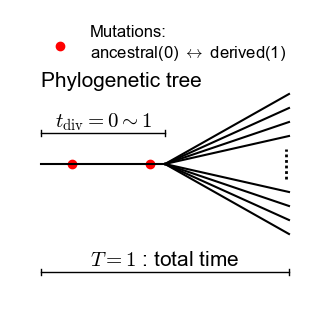

In [4]:
fig, ax = plt.subplots(figsize=(4,4))
make_tree(ax)
plt.savefig('figure1.eps', bbox_inches='tight')

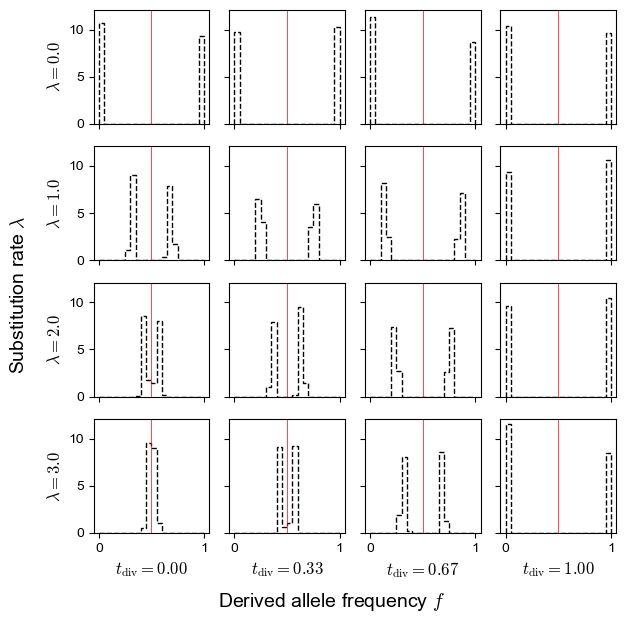

In [7]:
num_sequences=1000
n_grid = 4
n_sim = 200
rates = np.linspace(0, 3, n_grid)
ts = np.linspace(0, 1, n_grid)
thetas = np.zeros(n_sim)

fig, ax = plt.subplots(n_grid, n_grid, figsize=(1.5*n_grid, 1.5*n_grid), sharex=True, sharey=True)
for i, rate in enumerate(rates):
    for j, t in enumerate(ts):
        for k in range(n_sim):
            x0 = np.random.binomial(n=1,p=0.5)
            pos1 = simulate_state(t0=t, rate=rate, x0=x0, num_sequences=num_sequences)
            thetas[k] = pos1.mean()
        ax[i,j].hist(thetas, bins=np.linspace(0,1,21), density=True, edgecolor='black',histtype=u'step', ls='--')
        ax[i,j].axvline(0.5, color='red', lw=.5)
        if j == 0:
            ax[i,j].set_ylabel(r'$\lambda=%.1f$' % rate, fontsize=12)
        if i == n_grid-1:
            ax[i,j].set_xlabel(r'$t_{\mathrm{div}}=%.2f$' % t, fontsize=12)

fig.text(0.5, -0.02, r'Derived allele frequency $f$', fontsize=14, ha='center')
fig.text(-0.02, 0.5, r'Substitution rate $\lambda$', fontsize=14, rotation=90, va='center', ha='center')


plt.tight_layout()
plt.savefig('figure2.eps', bbox_inches='tight')
plt.show()

/home/hblee/.conda/envs/stats_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/home/hblee/.conda/envs/stats_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/home/hblee/.conda/envs/stats_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
/home/hblee/.conda/envs/stats_hw/lib/python3.11/site-packages/sklearn/metrics/_classification.py:409: UserWarning: A single label was fo

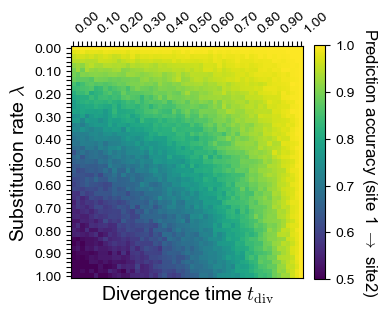

In [6]:
num_sequences=1000
n_sim = 51
rates = np.linspace(0, 1, n_sim)
ts = np.linspace(0, 1, n_sim)
mat = np.zeros((n_sim, n_sim))
for i, rate in enumerate(rates):
    for j, t in enumerate(ts):
        pos1 = simulate_state(t0=t, rate=rate, x0=0, num_sequences=num_sequences)
        pos2 = simulate_state(t0=t, rate=rate, x0=0, num_sequences=num_sequences)
        mat[i,j] = np.max(confusion_matrix(pos1, pos2) / num_sequences)

fig, ax = plt.subplots(figsize=(4,4))
make_hm(ax, mat, n_sim, rates, ts)
plt.tight_layout()
plt.savefig('figure3.eps', bbox_inches='tight')
plt.show()